### Start a spark session

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog") \
    .config("spark.jars.packages", "io.delta:delta-sharing-spark_2.12:3.3.0") \
    .getOrCreate()

In [4]:
import delta_sharing
config = "config.share"
client = delta_sharing.SharingClient(config)
client.list_all_tables()

[Table(name='ev3_device_data', share='start_hack_2025', schema='start_hack_2025'),
 Table(name='cc_api_logs', share='start_hack_2025', schema='start_hack_2025'),
 Table(name='ev3_dataprofile', share='start_hack_2025', schema='start_hack_2025')]

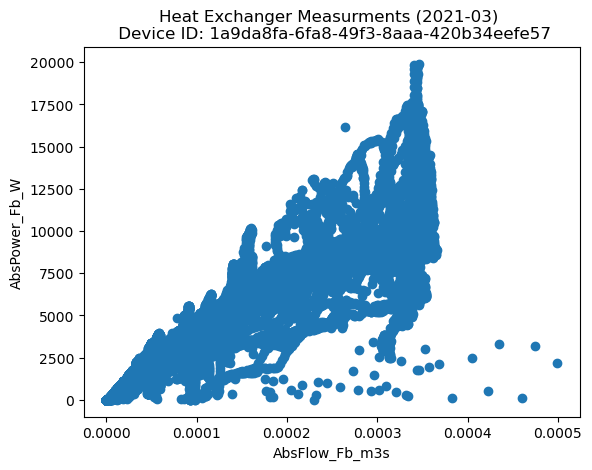

In [4]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

device_id = "1a9da8fa-6fa8-49f3-8aaa-420b34eefe57"
year_month = "202103"
x = "AbsFlow_Fb_m3s"
y = "AbsPower_Fb_W"
df_data = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.ev3_device_data").filter((col("device_id") == device_id) & (col("year_month") == year_month)).toPandas()
year_month = year_month[:4] + '-' + year_month[4:]
plt.scatter(df_data[x], df_data[y])
plt.xlabel(x)
plt.ylabel(y)
plt.title(f"Heat Exchanger Measurments ({year_month}) \n Device ID: {device_id}")
plt.show()

### Table 3
Cloud api logs describing interactions with our cloud.

In [4]:
df = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.cc_api_logs").limit(3)
df.toPandas()

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/spark/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
                          ^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/socket.py", line 718, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt


KeyboardInterrupt: 

### List Tables
Use the provided config

### Table 1
Energyvalve 3 dataprofile describing the datapoints found in the device data table.

In [5]:
df = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.ev3_dataprofile")
df.toPandas()

,id,access,basetype,description,format,name,privacy,restriction,definedBy,unit
0,evcloud.00009,r,int,Valve Type,application/vnd.belimo.enum;0|1,ValveType,False,uint8,evcloud/1.2,None
1,evcloud.10,r,int,DN Size of Valve,None,DN_Size,False,int32,evcloud/1.2,None
2,evcloud.100,r,real,Relative Flow in %,None,RelFlow_Fb_Rel2Vmax,False,"[-2147483.648,2147483.647]",evcloud/1.2,percent
3,evcloud.110,r,real,Absolute Flow in m3/s,None,AbsFlow_Fb_m3s,False,"[-2147483.648,2147483.647]",evcloud/1.2,cubicMetrePerSecond
4,evcloud.120,rw,real,Maximum Power Limit in %,None,Pmax_Rel_Write,False,"[0.5,100]",evcloud/1.2,percent
5,evcloud.130,r,real,Relative Power %,None,RelPower_Fb_Rel2Pmax,False,"[-2147483.648,2147483.647]",evcloud/1.2,percent
6,evcloud.140,r,real,Absolute Power in W,None,AbsPower_Fb_W,False,"[-2147483.648,2147483.647]",evcloud/1.2,watt
7,evcloud.150,r,real,Temperature 1 remote in K,None,T1_remote_K,False,"[-2147483.648,2147483.647]",evcloud/1.2,kelvin
8,evcloud.160,r,real,Temperature 2 embeded in K,None,T2_embeded_K,False,"[-2147483.648,2147483.647]",evcloud/1.2,kelvin
9,evcloud.170,rw,int,Delta T Limitation Type,application/vnd.belimo.enum;1|2|3,DeltaT_Limitation_Write,False,uint8,evcloud/1.2,None


In [7]:
feature_id = "evcloud.220"  # Change this to the feature you want

# Use PySpark filter and select to get the value
description = df.filter(df["id"] == feature_id).select("description").collect()[0][0]

print(f"Description for {feature_id}: {description}")


Description for evcloud.220: Err_State_Cloud_(MSB=FreezeWarn|MP2_nAlive|RevFlow|BPosG|P_Dmd_nReached|V_Dmd_nReached|Airbubbles|Flow_with_closed_Valve|Actuator_Stalled|Flow_Signal_Faulty|T2_Err|LSB=T1_Err)


### Table 2
Energyvalve 3 device data. **Big data** list of timeseries samples for devices. Devices are differentiated by the **device_id** column.

In [6]:
df1 = spark.read.format("deltaSharing").load("config.share#start_hack_2025.start_hack_2025.ev3_device_data").limit(300000)
df1.toPandas()

,device_id,dataprofile_id,cloud_received_time,sample_time,year,year_month,year_month_day,influx_migration_source_filename,T1_remote_K,T2_embeded_K,...,SpDeltaT_applied_K,Error_Status_Cloud,DDC_BUS_Sp_Write,dT_Manager_Ste,Active_dT_Manager_total_h,DeltaT_K,DDC_Sp_V,OperatingHours,Flow_Volume_total_m3,Y3AnalogInputValue
0,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-09 09:40:34.098,2019-06-09 09:38:32.312000,2019,201906,20190609,2019-06-09_09.gz,349.924869,323.425260,...,10.000000,0.0,91.900002,2.0,0.0,26.499609,4.940656e-324,2278.438304,9454.135186,NaN
1,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-18 23:18:23.274,2019-06-18 23:17:21.806000,2019,201906,20190618,2019-06-18_23.gz,349.945812,323.440885,...,5.000000,0.0,19.700001,2.0,0.0,26.504926,4.940656e-324,2508.085700,10513.017983,NaN
2,15cbf304-2834-4523-81d1-45c0bbc0f849,energyvalve3/1.11,2019-06-17 03:36:49.933,2019-06-17 03:33:48.073000,2019,201906,20190617,2019-06-17_03.gz,351.181414,324.487760,...,5.000000,0.0,31.400000,2.0,0.0,26.693653,1.361569e-04,2484.714193,35993.262013,NaN
3,15cbf304-2834-4523-81d1-45c0bbc0f849,energyvalve3/1.11,2019-06-17 08:18:08.063,2019-06-17 08:14:02.385000,2019,201906,20190617,2019-06-17_08.gz,351.181414,324.503385,...,5.000000,0.0,90.000000,2.0,0.0,26.678028,6.197484e-05,2489.384833,36060.931995,NaN
4,14e5bc06-9e32-4938-96df-82a070581e7d,energyvalve3/1.11,2019-06-08 02:22:01.103,2019-06-08 02:19:29.379000,2019,201906,20190608,2019-06-08_02.gz,349.935340,323.427865,...,5.000000,0.0,25.500000,2.0,0.0,26.507476,4.940656e-324,2247.120865,9321.962749,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,36917a03-8abe-44b0-b9e2-f58d663dd441,energyvalve3/1.11,2019-06-11 11:03:38.354,2019-06-11 11:00:47.288000,2019,201906,20190611,2019-06-11_11.gz,349.016754,323.961719,...,6.951430,0.0,79.699997,4.0,0.0,25.055035,5.906202e-17,2310.639063,20607.191401,NaN
299996,36917a03-8abe-44b0-b9e2-f58d663dd441,energyvalve3/1.11,2019-06-23 15:41:17.112,2019-06-23 15:40:15.924000,2019,201906,20190623,2019-06-23_15.gz,349.008901,323.953906,...,6.436319,0.0,33.400002,4.0,0.0,25.054994,2.848194e-34,2601.231446,23576.271271,NaN
299997,36917a03-8abe-44b0-b9e2-f58d663dd441,energyvalve3/1.11,2019-06-01 13:49:16.849,2019-06-01 13:45:30.985999,2019,201906,20190601,2019-06-01_13.gz,349.024607,323.966927,...,16.201959,0.0,70.400002,4.0,0.0,25.057680,2.414547e-07,2076.574181,17811.728517,NaN
299998,36917a03-8abe-44b0-b9e2-f58d663dd441,energyvalve3/1.11,2019-06-01 20:18:54.392,2019-06-01 20:17:37.136999,2019,201906,20190601,2019-06-01_20.gz,349.019372,323.964323,...,0.041011,0.0,16.299999,4.0,0.0,25.055049,4.265999e-05,2082.993471,17885.371350,NaN


In [7]:
df_pandas = df1.toPandas()
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 38 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   device_id                         300000 non-null  object        
 1   dataprofile_id                    300000 non-null  object        
 2   cloud_received_time               300000 non-null  datetime64[ns]
 3   sample_time                       300000 non-null  datetime64[ns]
 4   year                              300000 non-null  object        
 5   year_month                        300000 non-null  object        
 6   year_month_day                    300000 non-null  object        
 7   influx_migration_source_filename  300000 non-null  object        
 8   T1_remote_K                       299975 non-null  float64       
 9   T2_embeded_K                      299975 non-null  float64       
 10  RelFlow_Fb_Rel2Vmax             

In [31]:
print(df_pandas.columns.tolist())


['device_id', 'dataprofile_id', 'cloud_received_time', 'sample_time', 'year', 'year_month', 'year_month_day', 'influx_migration_source_filename', 'T1_remote_K', 'T2_embeded_K', 'RelFlow_Fb_Rel2Vmax', 'RelPower_Fb_Rel2Pmax', 'AbsFlow_Fb_m3s', 'AbsPower_Fb_W', 'Heating_E_J', 'Glycol_Concentration_Rel', 'ControlMode_Write', 'Cooling_E_J', 'RelPos_Fb', 'DeltaT_Limitation_Write', 'SpDeltaT_K_Write', 'Pmax_Rel_Write', 'Vmax_Rel_Write', 'InstallationPosition_Write', 'Override_Write', 'DN_Size', 'SpFlow_DeltaT_lmin_Write', 'DDC_Sp_Rel', 'SpDeltaT_applied_K', 'Error_Status_Cloud', 'DDC_BUS_Sp_Write', 'dT_Manager_Ste', 'Active_dT_Manager_total_h', 'DeltaT_K', 'DDC_Sp_V', 'OperatingHours', 'Flow_Volume_total_m3', 'Y3AnalogInputValue']


In [8]:
import pandas as pd
selected_features = [
    "device_id", "cloud_received_time", "sample_time", "T1_remote_K", "T2_embeded_K",
    "RelFlow_Fb_Rel2Vmax", "RelPower_Fb_Rel2Pmax", "AbsFlow_Fb_m3s", "AbsPower_Fb_W",
    "Heating_E_J", "Cooling_E_J", "RelPos_Fb", "DeltaT_K",
    "OperatingHours", "Error_Status_Cloud", "Flow_Volume_total_m3"
]

# Select only these columns
df_pandas = df_pandas[selected_features]
df_pandas.head()

,device_id,cloud_received_time,sample_time,T1_remote_K,T2_embeded_K,RelFlow_Fb_Rel2Vmax,RelPower_Fb_Rel2Pmax,AbsFlow_Fb_m3s,AbsPower_Fb_W,Heating_E_J,Cooling_E_J,RelPos_Fb,DeltaT_K,OperatingHours,Error_Status_Cloud,Flow_Volume_total_m3
0,14e5bc06-9e32-4938-96df-82a070581e7d,2019-06-09 09:40:34.098,2019-06-09 09:38:32.312,349.924869,323.425260,94.325362,3101.045821,0.002830,310104.582066,0.0,1.035416e+12,92.03,26.499609,2278.438304,0.0,9454.135186
1,14e5bc06-9e32-4938-96df-82a070581e7d,2019-06-18 23:18:23.274,2019-06-18 23:17:21.806,349.945812,323.440885,0.000000,0.000000,0.000000,0.000000,0.0,1.151466e+12,19.78,26.504926,2508.085700,0.0,10513.017983
2,15cbf304-2834-4523-81d1-45c0bbc0f849,2019-06-17 03:36:49.933,2019-06-17 03:33:48.073,351.181414,324.487760,100.613720,4934.568909,0.004025,444111.201850,0.0,3.971631e+12,31.22,26.693653,2484.714193,0.0,35993.262013
3,15cbf304-2834-4523-81d1-45c0bbc0f849,2019-06-17 08:18:08.063,2019-06-17 08:14:02.385,351.181414,324.503385,100.613720,4931.649279,0.004025,443848.435080,0.0,3.979098e+12,90.06,26.678028,2489.384833,0.0,36060.931995
4,14e5bc06-9e32-4938-96df-82a070581e7d,2019-06-08 02:22:01.103,2019-06-08 02:19:29.379,349.935340,323.427865,0.000000,0.000000,0.000000,0.000000,0.0,1.020931e+12,25.41,26.507476,2247.120865,0.0,9321.962749


In [9]:
df_pandas = df_pandas.sort_values(by=["device_id", "sample_time"])


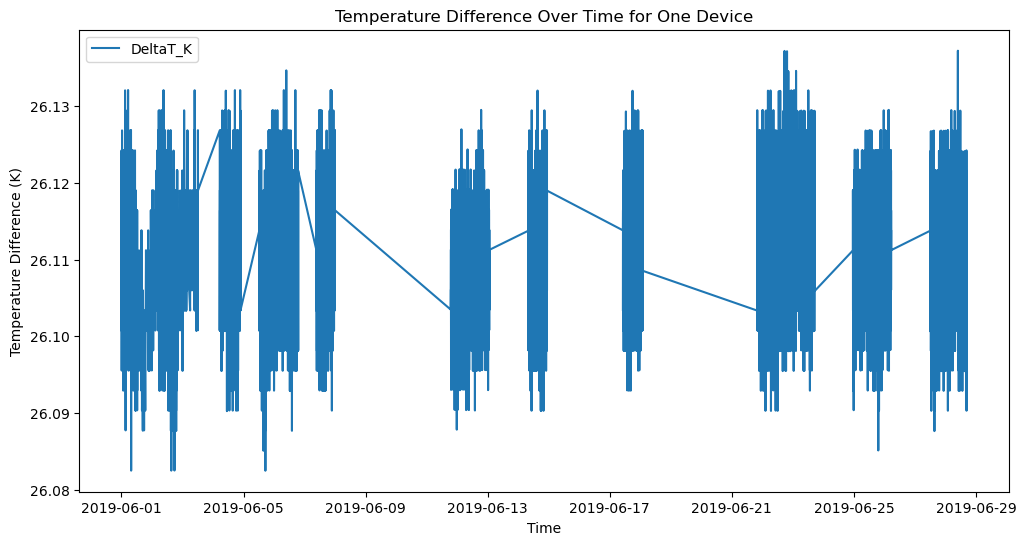

In [10]:
import matplotlib.pyplot as plt

device_sample = df_pandas[df_pandas["device_id"] == df_pandas["device_id"].unique()[0]]  # Pick one device

plt.figure(figsize=(12, 6))
plt.plot(device_sample["sample_time"], device_sample["DeltaT_K"], label="DeltaT_K")
plt.xlabel("Time")
plt.ylabel("Temperature Difference (K)")
plt.title("Temperature Difference Over Time for One Device")
plt.legend()
plt.show()

In [11]:
# Count unique values (distribution of error codes)
print(df_pandas["Error_Status_Cloud"].value_counts())


Error_Status_Cloud
0.0     279797
4.0      12309
16.0      7869
Name: count, dtype: int64


In [12]:
# Function to convert error number to bit string
def error_to_bit_string(error_value, num_bits=12):
    return format(int(error_value), f'0{num_bits}b')[::-1]  # Convert to binary & reverse bits

# Apply conversion to DataFrame
df_pandas["Error_Bit_String"] = df_pandas["Error_Status_Cloud"].fillna(0).apply(error_to_bit_string)

# Show results
df_pandas[["Error_Status_Cloud", "Error_Bit_String"]].head()


,Error_Status_Cloud,Error_Bit_String
247400,0.0,000000000000
247867,0.0,000000000000
247665,0.0,000000000000
247179,0.0,000000000000
248072,0.0,000000000000


In [13]:
# Define error labels based on bit positions
error_labels = [
    "T1_Err", "T2_Err", "Flow_Signal_Faulty", "Actuator_Stalled",
    "Flow_with_closed_Valve", "Airbubbles", "V_Dmd_nReached", "P_Dmd_nReached",
    "BPosG", "RevFlow", "MP2_nAlive", "FreezeWarn"
]

# Function to decode errors
def decode_errors(bit_string):
    return {error_labels[i]: int(bit_string[i]) for i in range(len(error_labels))}

# Apply decoding function
error_df = df_pandas["Error_Bit_String"].apply(decode_errors).apply(pd.Series)

# Merge with main DataFrame
df_pandas = pd.concat([df_pandas, error_df], axis=1)

# Show results
df_pandas.head()


,device_id,cloud_received_time,sample_time,T1_remote_K,T2_embeded_K,RelFlow_Fb_Rel2Vmax,RelPower_Fb_Rel2Pmax,AbsFlow_Fb_m3s,AbsPower_Fb_W,Heating_E_J,...,Flow_Signal_Faulty,Actuator_Stalled,Flow_with_closed_Valve,Airbubbles,V_Dmd_nReached,P_Dmd_nReached,BPosG,RevFlow,MP2_nAlive,FreezeWarn
247400,096a330d-3093-4890-b859-ca487e11bbbb,2019-06-01 00:01:33.236,2019-06-01 00:00:00.851,350.854188,324.737760,71.685061,258.556528,0.004072,439546.097313,0.0,...,0,0,0,0,0,0,0,0,0,0
247867,096a330d-3093-4890-b859-ca487e11bbbb,2019-06-01 00:01:33.236,2019-06-01 00:00:31.032,350.854188,324.737760,71.685061,258.556528,0.004072,439546.097313,0.0,...,0,0,0,0,0,0,0,0,0,0
247665,096a330d-3093-4890-b859-ca487e11bbbb,2019-06-01 00:01:33.236,2019-06-01 00:01:01.254,350.843717,324.742969,71.685061,258.400583,0.004072,439280.991456,0.0,...,0,0,0,0,0,0,0,0,0,0
247179,096a330d-3093-4890-b859-ca487e11bbbb,2019-06-01 00:01:34.150,2019-06-01 00:01:31.484,350.848953,324.742969,71.408285,257.454614,0.004056,437672.843770,0.0,...,0,0,0,0,0,0,0,0,0,0
248072,096a330d-3093-4890-b859-ca487e11bbbb,2019-06-01 00:06:35.803,2019-06-01 00:02:01.684,350.856806,324.740365,71.685061,258.556431,0.004072,439545.932520,0.0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Define error labels based on bit positions
error_labels = [
    "T1_Err", "T2_Err", "Flow_Signal_Faulty", "Actuator_Stalled",
    "Flow_with_closed_Valve", "Airbubbles", "V_Dmd_nReached", "P_Dmd_nReached",
    "BPosG", "RevFlow", "MP2_nAlive", "FreezeWarn"
]

# Count occurrences of each error type (sum of 1s in each column)
error_counts = df_pandas[error_labels].sum()

# Print each error and its occurrence count
for error, count in error_counts.items():
    print(f"{error}: {count}")
    

T1_Err: 0
T2_Err: 0
Flow_Signal_Faulty: 12309
Actuator_Stalled: 0
Flow_with_closed_Valve: 7869
Airbubbles: 0
V_Dmd_nReached: 0
P_Dmd_nReached: 0
BPosG: 0
RevFlow: 0
MP2_nAlive: 0
FreezeWarn: 0


In [15]:
df_pandas = df_pandas.loc[:, ~df_pandas.columns.duplicated()]

In [27]:
# Filter the dataset for devices that experienced "Flow_with_closed_Valve" error
devices_with_issue = df_pandas[df_pandas["Flow_with_closed_Valve"] == 1]["device_id"].unique()

# Convert to DataFrame for better readability
devices_with_issue

array(['123bacdf-65d4-429a-8c93-2d06416a9b3c',
       '15cbf304-2834-4523-81d1-45c0bbc0f849',
       '15d26fdd-a798-4cb3-b4c4-8bb3f814dcaa',
       '604956f4-1f12-4981-a37d-d1cc048b9cdc',
       '7124fa63-6c7a-4207-ad8e-4fae1135fddf',
       '712beda7-45ec-447d-9d0d-2c0741b587a2'], dtype=object)

In [96]:
print(df_pandas.columns[df_pandas.columns.duplicated()])

12d3456b-0e49-43c7-9543-f3714f1540cd',
       '14e5bc06-9e32-4938-96df-82a070581e7d',
       '36917a03-8abe-44b0-b9e2-f58d663dd441',
       '5fc40f80-0a58-4420-b7d6-f301d21eb7eb',
       'a42e0599-f18f-435e-ad97-7131277f42e9',
       'c421b7d1-617c-46cb-9463-e0920c2c7c18',
       'c5b48b21-9007-4bb5-8968-ba15a69a7900',
       'c5ca3fc9-bf93-4de1-ac0c-853e8043c5ba

Index([], dtype='object')


In [17]:
device_data = df_pandas[df_pandas["device_id"] == "123bacdf-65d4-429a-8c93-2d06416a9b3c"]
device_data.info()

flow_with_closed_valve_count = device_data["Flow_with_closed_Valve"].sum()
print(flow_with_closed_valve_count)


<class 'pandas.core.frame.DataFrame'>
Index: 37732 entries, 135895 to 133971
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   device_id               37732 non-null  object        
 1   cloud_received_time     37732 non-null  datetime64[ns]
 2   sample_time             37732 non-null  datetime64[ns]
 3   T1_remote_K             37732 non-null  float64       
 4   T2_embeded_K            37732 non-null  float64       
 5   RelFlow_Fb_Rel2Vmax     37732 non-null  float64       
 6   RelPower_Fb_Rel2Pmax    37732 non-null  float64       
 7   AbsFlow_Fb_m3s          37732 non-null  float64       
 8   AbsPower_Fb_W           37732 non-null  float64       
 9   Heating_E_J             37732 non-null  float64       
 10  Cooling_E_J             37732 non-null  float64       
 11  RelPos_Fb               37732 non-null  float64       
 12  DeltaT_K                37732 non-null  float

In [18]:
# Select relevant features (exclude device_id and timestamps)
features = [
    "T1_remote_K", "T2_embeded_K", "RelFlow_Fb_Rel2Vmax", "RelPower_Fb_Rel2Pmax", 
    "AbsFlow_Fb_m3s", "AbsPower_Fb_W", "Heating_E_J", "Cooling_E_J", 
    "RelPos_Fb", "DeltaT_K", "OperatingHours", "Flow_Volume_total_m3"
]

# Define X (independent variables) and y (target variable)
X = device_data[features]
y = device_data["Flow_with_closed_Valve"]


In [19]:
# Check for missing values
print(X.isnull().sum())

# Fill missing values with the column median (or use mean)
X = X.fillna(X.median())


T1_remote_K             0
T2_embeded_K            0
RelFlow_Fb_Rel2Vmax     0
RelPower_Fb_Rel2Pmax    0
AbsFlow_Fb_m3s          0
AbsPower_Fb_W           0
Heating_E_J             0
Cooling_E_J             0
RelPos_Fb               0
DeltaT_K                0
OperatingHours          0
Flow_Volume_total_m3    0
dtype: int64


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9970849344110242
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7144
           1       0.97      0.98      0.97       403

    accuracy                           1.00      7547
   macro avg       0.98      0.99      0.99      7547
weighted avg       1.00      1.00      1.00      7547



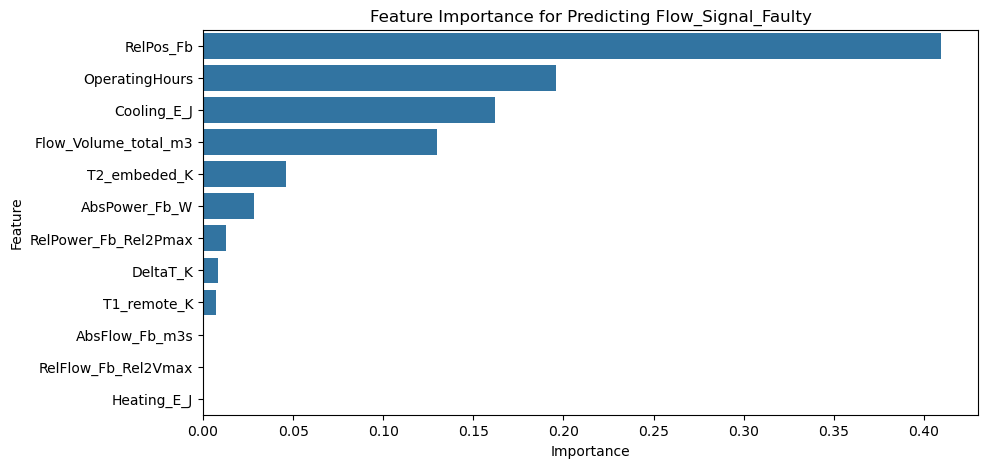

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance scores
importances = model.feature_importances_
feature_importance = pd.DataFrame({"Feature": features, "Importance": importances})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance for Predicting Flow_Signal_Faulty")
plt.show()


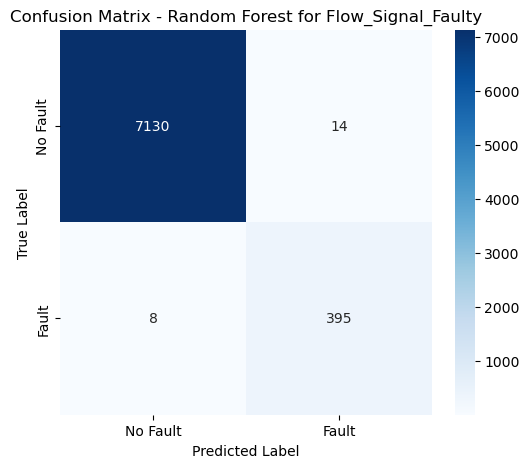

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fault", "Fault"], yticklabels=["No Fault", "Fault"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest for Flow_Signal_Faulty")
plt.show()


In [24]:
train_device_id = "123bacdf-65d4-429a-8c93-2d06416a9b3c"
devices_for_testing = [d for d in devices_with_issue if d != train_device_id]

In [25]:
# Initialize lists to store actual and predicted values
all_y_test = []
all_y_pred = []

for device_id in devices_for_testing:
    test_device_data = df_pandas[df_pandas["device_id"] == device_id].dropna()

    if test_device_data.empty:  # Skip if no data
        continue

    X_test_device = test_device_data[features]
    y_test_device = test_device_data["Flow_with_closed_Valve"]
    
    y_pred_device = model.predict(X_test_device)

    # Store results
    all_y_test.extend(y_test_device)
    all_y_pred.extend(y_pred_device)

# Compute overall evaluation metrics
print("Overall Model Evaluation on Unseen Devices:")
print("Accuracy:", accuracy_score(all_y_test, all_y_pred))
print(classification_report(all_y_test, all_y_pred))


Overall Model Evaluation on Unseen Devices:
Accuracy: 0.9119465819544467
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     59137
           1       0.00      0.00      0.00      5710

    accuracy                           0.91     64847
   macro avg       0.46      0.50      0.48     64847
weighted avg       0.83      0.91      0.87     64847



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TIME SERIES PREDICTION 

In [34]:
from pyspark.sql.functions import col

start_time = "2019-06-05 00:00:00"
end_time = "2019-06-10 23:59:59"

# Load and filter dataset in Spark before converting to Pandas
df3 = (
    spark.read.format("deltaSharing")
    .load("config.share#start_hack_2025.start_hack_2025.ev3_device_data")
    .filter((col("sample_time") >= start_time) & (col("sample_time") <= end_time))  # Step 1: Filter
    .orderBy(["device_id", "sample_time"])  # Step 2: Order (Ensures full device data is grouped)
    .limit(30000)  # Step 3: Limit (Keeps first 30,000 rows after ordering)
)

# Convert to Pandas
df_pandas = df3.toPandas()

In [35]:
df_pandas.sort_values(by=["device_id", "sample_time"])


,device_id,dataprofile_id,cloud_received_time,sample_time,year,year_month,year_month_day,influx_migration_source_filename,T1_remote_K,T2_embeded_K,...,SpDeltaT_applied_K,Error_Status_Cloud,DDC_BUS_Sp_Write,dT_Manager_Ste,Active_dT_Manager_total_h,DeltaT_K,DDC_Sp_V,OperatingHours,Flow_Volume_total_m3,Y3AnalogInputValue
0,00282943-aa00-41b2-aa49-0c5a5d7ea5a9,energyvalve3/1.11,2019-06-06 08:05:06.068,2019-06-06 08:05:06.067000,2019,201906,20190606,2019-06-06_08.gz,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00a93b07-6029-4555-8e22-5335c4999156,energyvalve3/1.11,2019-06-07 10:35:02.583,2019-06-07 10:35:02.582000,2019,201906,20190607,2019-06-07_10.gz,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02192c8e-14cf-4903-a312-2629dc6dda5e,energyvalve3/1.11,2019-06-06 05:05:03.884,2019-06-06 05:05:03.883000,2019,201906,20190606,2019-06-06_05.gz,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,05e452d6-c0af-4c77-bb5a-75fc26b80861,energyvalve3/1.11,2019-06-05 00:01:44.464,2019-06-05 00:00:13.087000,2019,201906,20190605,2019-06-05_00.gz,350.430105,323.873177,...,5.0,0.0,76.400002,2.0,0.0,26.556928,1.814203e-05,2174.679780,31442.726980,NaN
4,05e452d6-c0af-4c77-bb5a-75fc26b80861,energyvalve3/1.11,2019-06-05 00:01:44.464,2019-06-05 00:00:43.212000,2019,201906,20190605,2019-06-05_00.gz,350.422251,323.880990,...,5.0,0.0,76.400002,2.0,0.0,26.541262,2.976895e-08,2174.688147,31442.848211,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,096a330d-3093-4890-b859-ca487e11bbbb,energyvalve3/1.11,2019-06-09 11:18:03.967,2019-06-09 11:13:59.344000,2019,201906,20190609,2019-06-09_11.gz,350.846335,324.753385,...,10.0,0.0,82.000000,2.0,0.0,26.092950,9.356116e-04,2298.388095,33400.289254,NaN
29996,096a330d-3093-4890-b859-ca487e11bbbb,energyvalve3/1.11,2019-06-09 11:18:03.967,2019-06-09 11:14:29.577000,2019,201906,20190609,2019-06-09_11.gz,350.848953,324.740365,...,10.0,0.0,82.000000,2.0,0.0,26.108588,1.016172e-03,2298.396489,33400.411884,NaN
29997,096a330d-3093-4890-b859-ca487e11bbbb,energyvalve3/1.11,2019-06-09 11:18:03.967,2019-06-09 11:14:59.784999,2019,201906,20190609,2019-06-09_11.gz,350.848953,324.735156,...,10.0,0.0,82.000000,2.0,0.0,26.113797,1.443003e-05,2298.404884,33400.534528,NaN
29998,096a330d-3093-4890-b859-ca487e11bbbb,energyvalve3/1.11,2019-06-09 11:18:03.967,2019-06-09 11:15:29.967000,2019,201906,20190609,2019-06-09_11.gz,350.848953,324.740365,...,10.0,0.0,91.800000,2.0,0.0,26.108588,8.899479e-04,2298.413288,33400.657240,NaN


In [42]:
df_pandas["device_id"].unique()

array(['00282943-aa00-41b2-aa49-0c5a5d7ea5a9',
       '00a93b07-6029-4555-8e22-5335c4999156',
       '02192c8e-14cf-4903-a312-2629dc6dda5e',
       '05e452d6-c0af-4c77-bb5a-75fc26b80861',
       '0640f024-0ebf-4bb7-b19a-6e3fc7e13a4f',
       '0790b638-155c-49cd-8366-1937756cf583',
       '0847ff3d-dc14-4b9e-aaa3-41b690de6ace',
       '096a330d-3093-4890-b859-ca487e11bbbb'], dtype=object)

In [39]:
devices_with_errors = df_pandas[df_pandas["Error_Status_Cloud"] > 0.0]["device_id"].unique()
print(devices_with_errors)

['05e452d6-c0af-4c77-bb5a-75fc26b80861']


In [40]:
df_clean = df_pandas[~df_pandas["device_id"].isin(devices_with_errors)]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12798 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   device_id                         12798 non-null  object        
 1   dataprofile_id                    12798 non-null  object        
 2   cloud_received_time               12798 non-null  datetime64[ns]
 3   sample_time                       12798 non-null  datetime64[ns]
 4   year                              12798 non-null  object        
 5   year_month                        12798 non-null  object        
 6   year_month_day                    12798 non-null  object        
 7   influx_migration_source_filename  12798 non-null  object        
 8   T1_remote_K                       12792 non-null  float64       
 9   T2_embeded_K                      12792 non-null  float64       
 10  RelFlow_Fb_Rel2Vmax               12792 non-null  f

In [41]:
df_clean.sort_values(by=["device_id", "sample_time"])

,device_id,dataprofile_id,cloud_received_time,sample_time,year,year_month,year_month_day,influx_migration_source_filename,T1_remote_K,T2_embeded_K,...,SpDeltaT_applied_K,Error_Status_Cloud,DDC_BUS_Sp_Write,dT_Manager_Ste,Active_dT_Manager_total_h,DeltaT_K,DDC_Sp_V,OperatingHours,Flow_Volume_total_m3,Y3AnalogInputValue
0,00282943-aa00-41b2-aa49-0c5a5d7ea5a9,energyvalve3/1.11,2019-06-06 08:05:06.068,2019-06-06 08:05:06.067000,2019,201906,20190606,2019-06-06_08.gz,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00a93b07-6029-4555-8e22-5335c4999156,energyvalve3/1.11,2019-06-07 10:35:02.583,2019-06-07 10:35:02.582000,2019,201906,20190607,2019-06-07_10.gz,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02192c8e-14cf-4903-a312-2629dc6dda5e,energyvalve3/1.11,2019-06-06 05:05:03.884,2019-06-06 05:05:03.883000,2019,201906,20190606,2019-06-06_05.gz,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17205,0640f024-0ebf-4bb7-b19a-6e3fc7e13a4f,energyvalve3/1.11,2019-06-07 07:35:06.169,2019-06-07 07:35:06.168000,2019,201906,20190607,2019-06-07_07.gz,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17206,0790b638-155c-49cd-8366-1937756cf583,energyvalve3/1.11,2019-06-06 12:40:07.027,2019-06-06 12:40:07.025999,2019,201906,20190606,2019-06-06_12.gz,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,096a330d-3093-4890-b859-ca487e11bbbb,energyvalve3/1.11,2019-06-09 11:18:03.967,2019-06-09 11:13:59.344000,2019,201906,20190609,2019-06-09_11.gz,350.846335,324.753385,...,10.0,0.0,82.0,2.0,0.0,26.092950,0.000936,2298.388095,33400.289254,NaN
29996,096a330d-3093-4890-b859-ca487e11bbbb,energyvalve3/1.11,2019-06-09 11:18:03.967,2019-06-09 11:14:29.577000,2019,201906,20190609,2019-06-09_11.gz,350.848953,324.740365,...,10.0,0.0,82.0,2.0,0.0,26.108588,0.001016,2298.396489,33400.411884,NaN
29997,096a330d-3093-4890-b859-ca487e11bbbb,energyvalve3/1.11,2019-06-09 11:18:03.967,2019-06-09 11:14:59.784999,2019,201906,20190609,2019-06-09_11.gz,350.848953,324.735156,...,10.0,0.0,82.0,2.0,0.0,26.113797,0.000014,2298.404884,33400.534528,NaN
29998,096a330d-3093-4890-b859-ca487e11bbbb,energyvalve3/1.11,2019-06-09 11:18:03.967,2019-06-09 11:15:29.967000,2019,201906,20190609,2019-06-09_11.gz,350.848953,324.740365,...,10.0,0.0,91.8,2.0,0.0,26.108588,0.000890,2298.413288,33400.657240,NaN


In [53]:
from pyspark.sql.functions import col

device_id = "096a330d-3093-4890-b859-ca487e11bbbb"  # Replace with actual device ID
start_time = "2019-06-01 00:00:00"
end_time = "2019-06-05 23:59:59"

# Load and filter dataset in Spark for one specific device and time range
df4 = (
    spark.read.format("deltaSharing")
    .load("config.share#start_hack_2025.start_hack_2025.ev3_device_data")
    .filter((col("device_id") == device_id) & 
            (col("sample_time") >= start_time) & 
            (col("sample_time") <= end_time))
    .orderBy("sample_time")  # Order time series for the selected device
    .limit(30000)
)


# Convert to Pandas
df_one_device = df4.toPandas()

In [54]:
df_one_device.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14313 entries, 0 to 14312
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   device_id                         14313 non-null  object        
 1   dataprofile_id                    14313 non-null  object        
 2   cloud_received_time               14313 non-null  datetime64[ns]
 3   sample_time                       14313 non-null  datetime64[ns]
 4   year                              14313 non-null  object        
 5   year_month                        14313 non-null  object        
 6   year_month_day                    14313 non-null  object        
 7   influx_migration_source_filename  14313 non-null  object        
 8   T1_remote_K                       14313 non-null  float64       
 9   T2_embeded_K                      14313 non-null  float64       
 10  RelFlow_Fb_Rel2Vmax               14313 non-nu

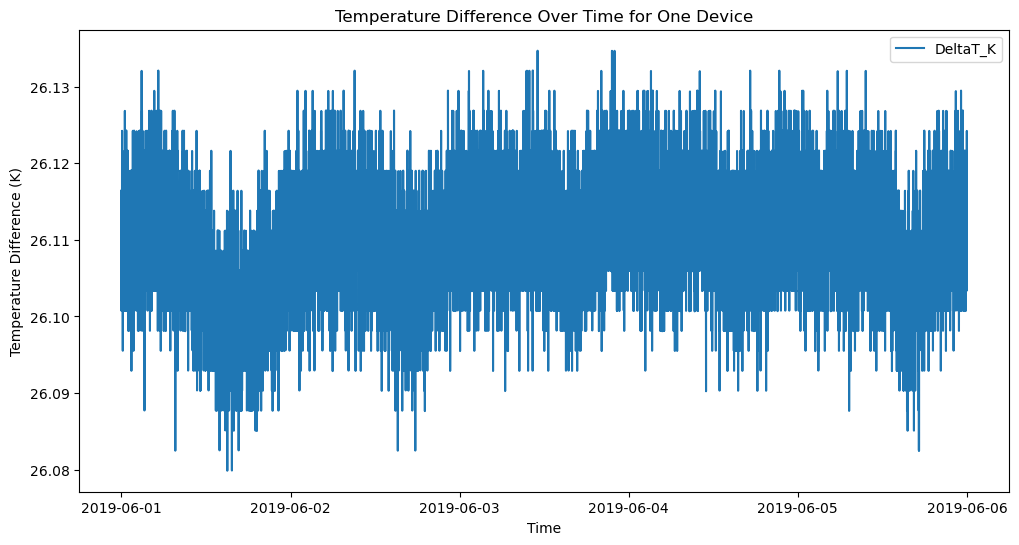

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

df_one_device["sample_time"] = pd.to_datetime(df_one_device["sample_time"])


plt.figure(figsize=(12, 6))
plt.plot(df_one_device["sample_time"], df_one_device["DeltaT_K"], label="DeltaT_K")
plt.xlabel("Time")
plt.ylabel("Temperature Difference (K)")
plt.title("Temperature Difference Over Time for One Device")
plt.legend()
plt.show()

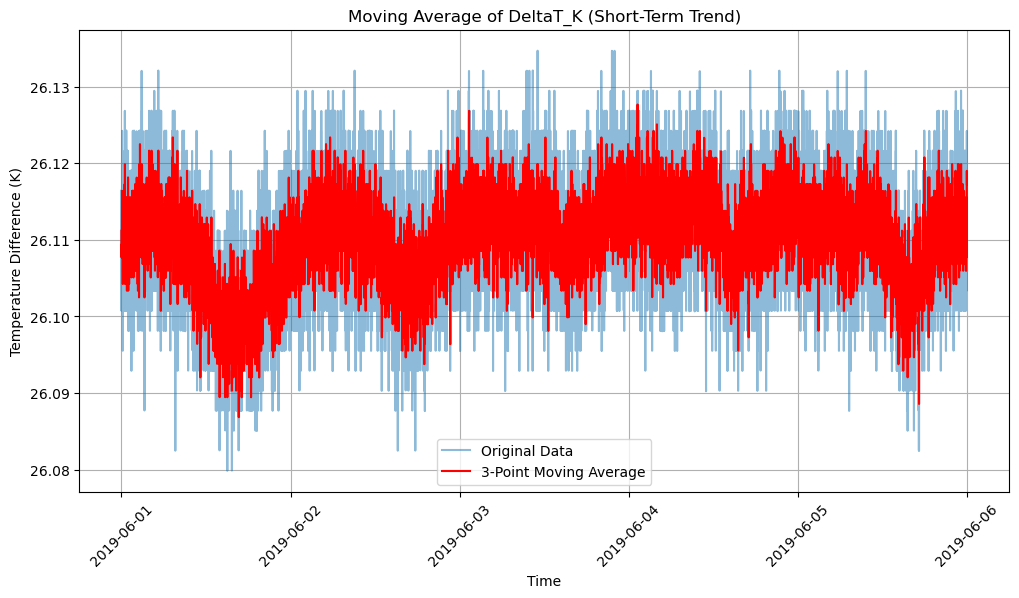

In [56]:
df_one_device["rolling_mean"] = df_one_device["DeltaT_K"].rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_one_device["sample_time"], df_one_device["DeltaT_K"], alpha=0.5, label="Original Data")
plt.plot(df_one_device["sample_time"], df_one_device["rolling_mean"], color="red", label="3-Point Moving Average")
plt.xlabel("Time")
plt.ylabel("Temperature Difference (K)")
plt.title("Moving Average of DeltaT_K (Short-Term Trend)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


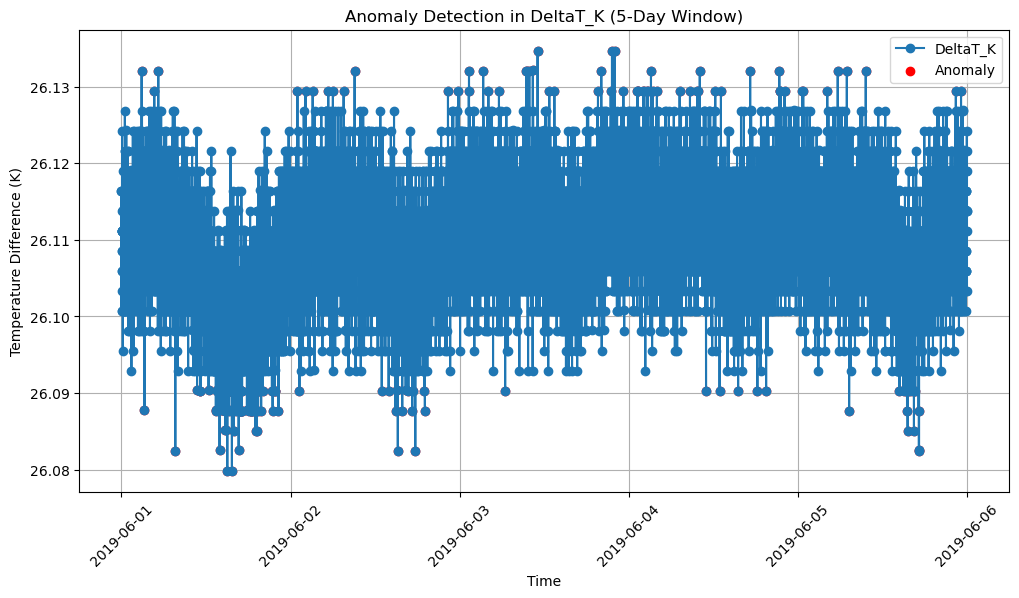

In [57]:
import numpy as np

df_one_device["Z_Score"] = (df_one_device["DeltaT_K"] - df_one_device["DeltaT_K"].mean()) / df_one_device["DeltaT_K"].std()
df_one_device["Anomaly"] = df_one_device["Z_Score"].apply(lambda x: 1 if np.abs(x) > 2.5 else 0)  # Mark anomalies where Z-score > 2.5

plt.figure(figsize=(12, 6))
plt.plot(df_one_device["sample_time"], df_one_device["DeltaT_K"], label="DeltaT_K", marker="o")
plt.scatter(df_one_device[df_one_device["Anomaly"] == 1]["sample_time"], 
            df_one_device[df_one_device["Anomaly"] == 1]["DeltaT_K"], 
            color="red", label="Anomaly", marker="o")
plt.xlabel("Time")
plt.ylabel("Temperature Difference (K)")
plt.title("Anomaly Detection in DeltaT_K (5-Day Window)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


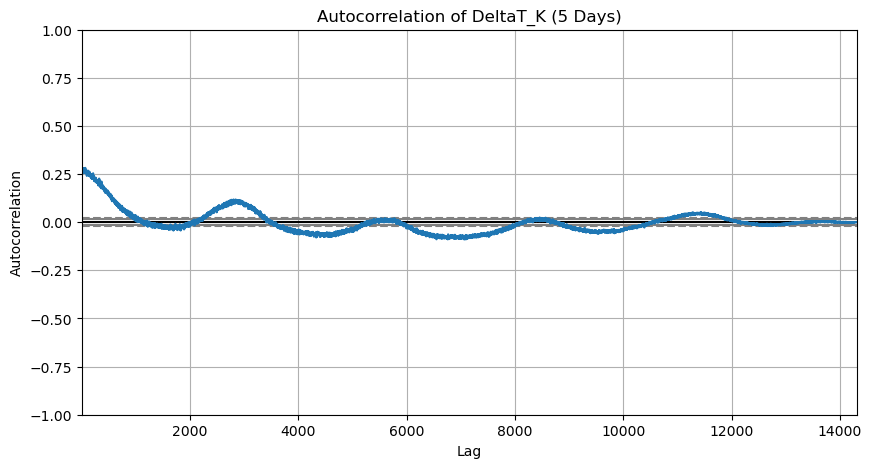

In [58]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 5))
autocorrelation_plot(df_one_device["DeltaT_K"])
plt.title("Autocorrelation of DeltaT_K (5 Days)")
plt.show()


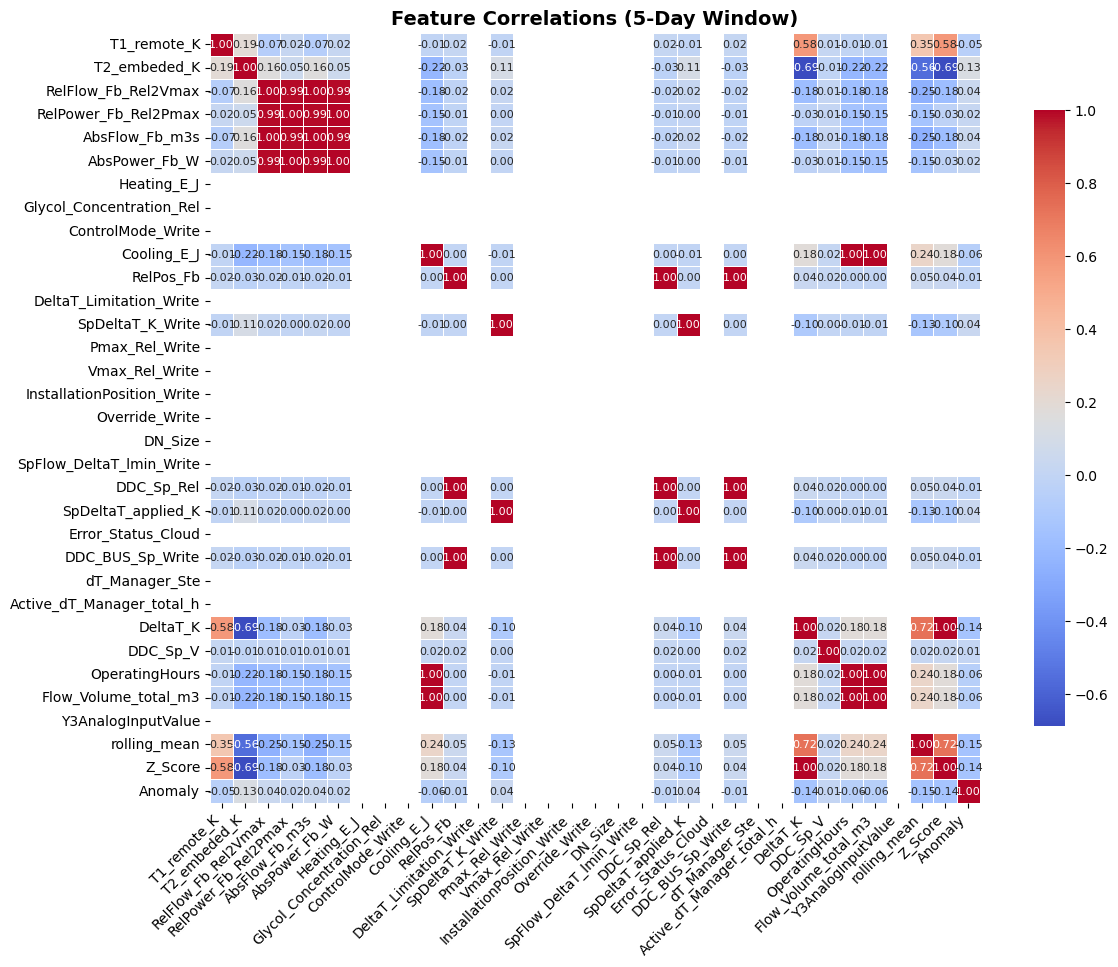

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(14, 10))

# Customize the heatmap with better aesthetics
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=0.5, 
    annot_kws={"size": 8},  # Smaller font size for better readability
    cbar_kws={'shrink': 0.8},  # Shrink color bar for better visualization
    square=True  # Keep heatmap squares aligned
)

# Improve title readability
plt.title("Feature Correlations (5-Day Window)", fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)

plt.show()


In [1]:
import timesfm

# For PyTorch
tfm = timesfm.TimesFm(
      hparams=timesfm.TimesFmHparams(
          backend= "gpu",
          per_core_batch_size=32,
          horizon_len=128,
          input_patch_len=32,
          output_patch_len=128,
          num_layers=50,
          model_dims=1280,
          use_positional_embedding=False,
      ),
      checkpoint=timesfm.TimesFmCheckpoint(
          huggingface_repo_id="google/timesfm-2.0-500m-pytorch"),
  )

 See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded PyTorch TimesFM, likely because python version is 3.11.10 | packaged by conda-forge | (main, Oct 16 2024, 01:19:04) [GCC 13.3.0].


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

In [63]:
df_one_device["ds"] = df_one_device["sample_time"]
df_one_device["unique_id"] = "T1" 

df_test = df_one_device[["unique_id", "ds", "DeltaT_K"]]

forecast_df = tfm.forecast_on_df(
    inputs=df_test,
    freq="MIN", 
    value_name="DeltaT_K",
    num_jobs=-1,
)

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


In [64]:
forecast_df

,unique_id,ds,timesfm,timesfm-q-0.1,timesfm-q-0.2,timesfm-q-0.3,timesfm-q-0.4,timesfm-q-0.5,timesfm-q-0.6,timesfm-q-0.7,timesfm-q-0.8,timesfm-q-0.9
0,T1,2019-06-06 00:00:54.591,26.112711,26.104630,26.107378,26.109436,26.111092,26.112711,26.114269,26.116009,26.118078,26.120991
1,T1,2019-06-06 00:01:54.591,26.112495,26.104364,26.107119,26.109173,26.110857,26.112495,26.114088,26.115843,26.117971,26.120914
2,T1,2019-06-06 00:02:54.591,26.112610,26.104481,26.107328,26.109289,26.111038,26.112610,26.114275,26.116011,26.118187,26.121191
3,T1,2019-06-06 00:03:54.591,26.112366,26.104237,26.107027,26.109053,26.110771,26.112366,26.114016,26.115799,26.117874,26.120905
4,T1,2019-06-06 00:04:54.591,26.112328,26.104267,26.106997,26.109011,26.110722,26.112328,26.113964,26.115728,26.117802,26.120811
...,...,...,...,...,...,...,...,...,...,...,...,...
123,T1,2019-06-06 02:03:54.591,26.111700,26.103579,26.106325,26.108341,26.110096,26.111700,26.113319,26.115118,26.117247,26.120256
124,T1,2019-06-06 02:04:54.591,26.111795,26.103607,26.106413,26.108397,26.110130,26.111795,26.113415,26.115170,26.117237,26.120235
125,T1,2019-06-06 02:05:54.591,26.111851,26.103563,26.106409,26.108433,26.110188,26.111851,26.113504,26.115265,26.117332,26.120363
126,T1,2019-06-06 02:06:54.591,26.111757,26.103554,26.106356,26.108416,26.110151,26.111757,26.113491,26.115320,26.117392,26.120434


In [59]:
#actual data 
device_id = "096a330d-3093-4890-b859-ca487e11bbbb"  # Replace with actual device ID
start_time = "2019-06-06 00:00:30"
end_time = "2019-06-06 02:08:00"

# Load and filter dataset in Spark for one specific device and time range
df5 = (
    spark.read.format("deltaSharing")
    .load("config.share#start_hack_2025.start_hack_2025.ev3_device_data")
    .filter((col("device_id") == device_id) & 
            (col("sample_time") >= start_time) & 
            (col("sample_time") <= end_time))
    .orderBy("sample_time")  # Order time series for the selected device
    .limit(30000)
)


# Convert to Pandas
actual_df = df5.toPandas()

In [61]:
actual_df.head()

,device_id,dataprofile_id,cloud_received_time,year,year_month,year_month_day,influx_migration_source_filename,T1_remote_K,T2_embeded_K,RelFlow_Fb_Rel2Vmax,...,SpDeltaT_applied_K,Error_Status_Cloud,DDC_BUS_Sp_Write,dT_Manager_Ste,Active_dT_Manager_total_h,DeltaT_K,DDC_Sp_V,OperatingHours,Flow_Volume_total_m3,Y3AnalogInputValue
sample_time,,,,,,,,,,,,,,,,,,,,,
2019-06-06 00:00:54.891000,096a330d-3093-4890-b859-ca487e11bbbb,energyvalve3/1.11,2019-06-06 00:01:34.697,2019,201906,20190606,2019-06-06_00.gz,350.846335,324.740365,71.408285,...,5.0,0.0,79.3,2,0.0,26.105970,0.000732,2215.170170,32184.195106,NaN
2019-06-06 00:01:25.081999,096a330d-3093-4890-b859-ca487e11bbbb,energyvalve3/1.11,2019-06-06 00:01:34.697,2019,201906,20190606,2019-06-06_00.gz,350.848953,324.737760,71.408285,...,5.0,0.0,79.3,2,0.0,26.111192,0.000061,2215.178565,32184.317739,NaN
2019-06-06 00:01:55.235000,096a330d-3093-4890-b859-ca487e11bbbb,energyvalve3/1.11,2019-06-06 00:06:36.254,2019,201906,20190606,2019-06-06_00.gz,350.846335,324.735156,71.685061,...,5.0,0.0,79.3,2,0.0,26.111179,0.001541,2215.186928,32184.439946,NaN
2019-06-06 00:02:25.404000,096a330d-3093-4890-b859-ca487e11bbbb,energyvalve3/1.11,2019-06-06 00:06:36.254,2019,201906,20190606,2019-06-06_00.gz,350.851571,324.735156,71.685061,...,5.0,0.0,67.1,2,0.0,26.116414,0.000789,2215.195324,32184.562659,NaN
2019-06-06 00:02:55.582000,096a330d-3093-4890-b859-ca487e11bbbb,energyvalve3/1.11,2019-06-06 00:06:36.254,2019,201906,20190606,2019-06-06_00.gz,350.856806,324.737760,71.408285,...,5.0,0.0,67.1,2,0.0,26.119046,0.000011,2215.203704,32184.685105,NaN


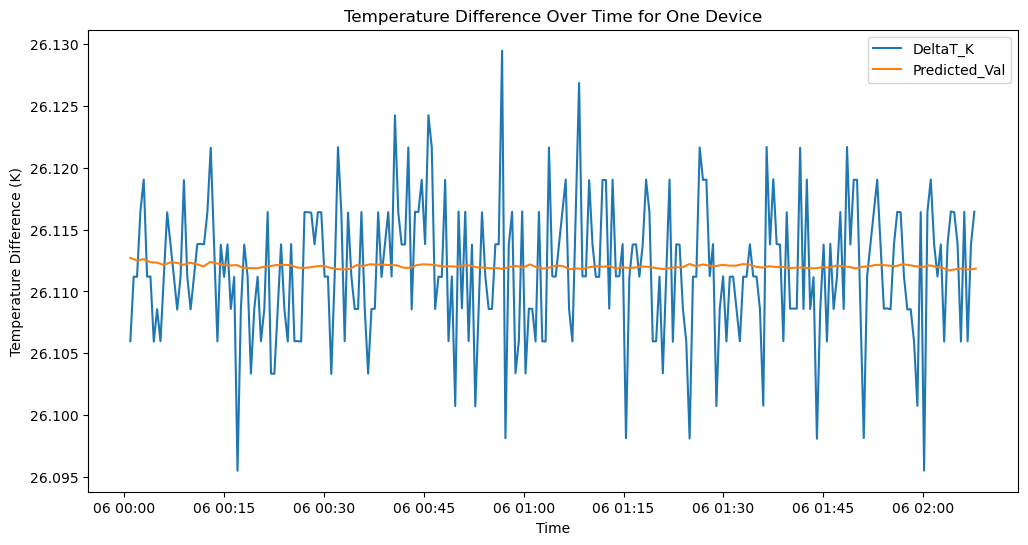

In [66]:
actual_df["sample_time"] = pd.to_datetime(actual_df["sample_time"])
actual_df.set_index("sample_time", inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(actual_df.index, actual_df["DeltaT_K"], label="DeltaT_K")
plt.plot(forecast_df["ds"], forecast_df["timesfm"], label="Predicted_Val")
plt.xlabel("Time")
plt.ylabel("Temperature Difference (K)")
plt.title("Temperature Difference Over Time for One Device")
plt.legend()
plt.show()

In [84]:
from pyspark.sql.functions import col, window, first

device_id = "1a9da8fa-6fa8-49f3-8aaa-420b34eefe57"
year_start = "2020-06-08 00:00:00"
year_end = "2021-06-07 23:59:59"

df_filtered = (
    spark.read.format("deltaSharing")
    .load("config.share#start_hack_2025.start_hack_2025.ev3_device_data")
    .filter((col("device_id") == device_id) & (col("sample_time") >= year_start) & (col("sample_time") <= year_end))
    .groupBy(window(col("sample_time"), "1 hour"), col("device_id"))
    .agg(first("DeltaT_K").alias("DeltaT_K"))  # You can also use avg() or other aggregations
    .orderBy("window")
    .limit(30000)
)

df_year = df_filtered.toPandas()

In [85]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   window     8760 non-null   object 
 1   device_id  8760 non-null   object 
 2   DeltaT_K   8760 non-null   float64
dtypes: float64(1), object(2)
memory usage: 205.4+ KB


In [86]:
df_year["window_start"] = df_year["window"].apply(lambda x: x[0])  # Extract the start time
df_year["window_start"] = pd.to_datetime(df_year["window_start"])  # Convert to datetime

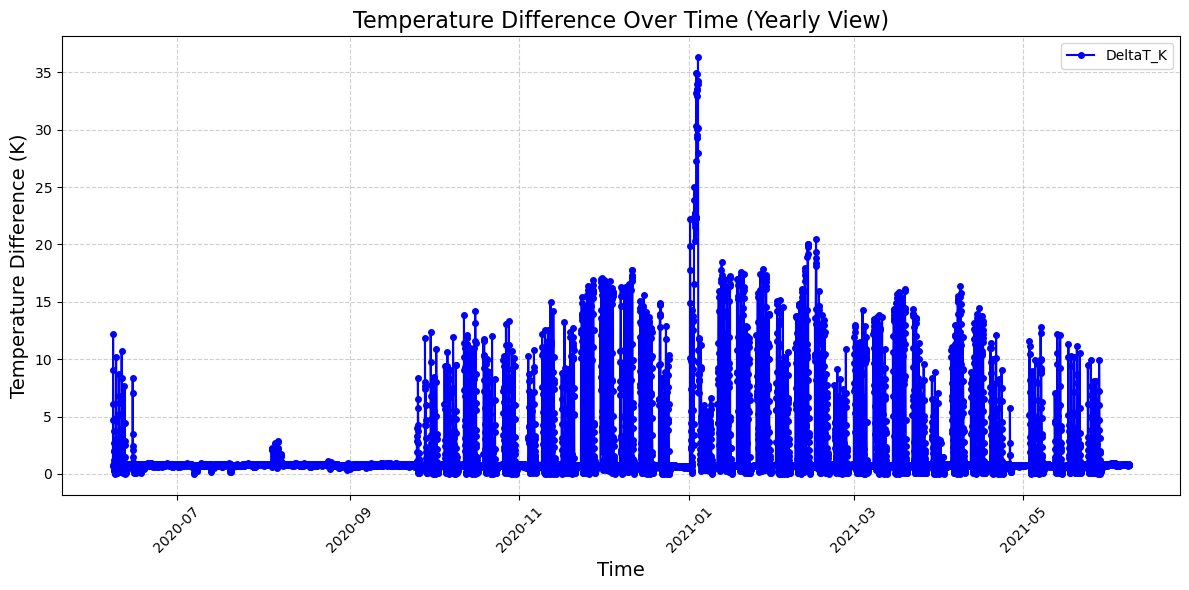

In [87]:
plt.figure(figsize=(12, 6))
plt.plot(df_year["window_start"], df_year["DeltaT_K"], marker='o', linestyle='-', markersize=4, label="DeltaT_K", color='b')

plt.xlabel("Time", fontsize=14)
plt.ylabel("Temperature Difference (K)", fontsize=14)
plt.title("Temperature Difference Over Time (Yearly View)", fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [88]:
device_id = "096a330d-3093-4890-b859-ca487e11bbbb"  # Replace with actual device ID
start_time = "2019-06-06 00:00:00"
end_time = "2019-10-31 23:59:59"

# Load and filter dataset in Spark for one specific device and time range
df6 = (
    spark.read.format("deltaSharing")
    .load("config.share#start_hack_2025.start_hack_2025.ev3_device_data")
    .filter((col("device_id") == device_id) & 
            (col("sample_time") >= start_time) & 
            (col("sample_time") <= end_time))
    .orderBy("sample_time")  # Order time series for the selected device
    .limit(30000)
)


# Convert to Pandas
last_df = df6.toPandas()

In [95]:
last_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   device_id                         30000 non-null  object        
 1   dataprofile_id                    30000 non-null  object        
 2   cloud_received_time               30000 non-null  datetime64[ns]
 3   sample_time                       30000 non-null  datetime64[ns]
 4   year                              30000 non-null  object        
 5   year_month                        30000 non-null  object        
 6   year_month_day                    30000 non-null  object        
 7   influx_migration_source_filename  30000 non-null  object        
 8   T1_remote_K                       30000 non-null  float64       
 9   T2_embeded_K                      30000 non-null  float64       
 10  RelFlow_Fb_Rel2Vmax               30000 non-nu

In [97]:
last_df["Pmax_Rel_Write"].describe()

count    30000.0
mean        10.0
std          0.0
min         10.0
25%         10.0
50%         10.0
75%         10.0
max         10.0
Name: Pmax_Rel_Write, dtype: float64

In [98]:
last_df["Vmax_Rel_Write"].describe()

count    30000.0
mean        71.0
std          0.0
min         71.0
25%         71.0
50%         71.0
75%         71.0
max         71.0
Name: Vmax_Rel_Write, dtype: float64

In [99]:
last_df["RelFlow_Fb_Rel2Vmax"].describe()

count    30000.000000
mean        71.447965
std          0.096997
min         71.408285
25%         71.408285
50%         71.408285
75%         71.408285
max         71.685061
Name: RelFlow_Fb_Rel2Vmax, dtype: float64

In [100]:
last_df["RelPower_Fb_Rel2Pmax"].describe()

count    30000.000000
mean       257.640171
std          0.355823
min        257.247556
25%        257.454710
50%        257.506427
75%        257.558819
max        258.712958
Name: RelPower_Fb_Rel2Pmax, dtype: float64